# PYTORCH Custom datasets with FOOD101 dataset

one of the ways to do so is via: custom datasets



In [1]:
import torch
from torch import nn


print(f"Torch version {torch.__version__}")

Torch version 2.5.1+cu121


In [2]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
# get Data set

#OUr data set is subset of food101 dataset

#OUr dataset starts with 3 classes of food and only 10% of the images
import requests
import zipfile
from pathlib import Path

#setup path to the data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory already exists")
else:
    print(f"creating {image_path} directory")
    image_path.mkdir(parents=True, exist_ok=True)


creating data/pizza_steak_sushi directory


In [4]:
with open(data_path/ "pizza_steak_sushi.zip", 'wb') as f:
  request  = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data")
  f.write(request.content)

with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip", "r") as zipRef:
  print("Unzipping pizza, steak, sushi data")
  zipRef.extractall(image_path)

Unzipping pizza, steak, sushi data


# Now we have the custom data in the form of images, we need to convert it to TENSORS so that we can proceed with our model training.


In [5]:
import os
def walk_through_dir(dir_path):
  """
  Walks through the path returning its contents
  """
  for root, dir, files in os.walk(dir_path):
    print(f"There are {len(dir)} directories and {len(files)} images in {root}")


In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi


In [7]:
test_dir = image_path / "test"
train_dir = image_path / "train"

test_dir, train_dir

(PosixPath('data/pizza_steak_sushi/test'),
 PosixPath('data/pizza_steak_sushi/train'))

data/pizza_steak_sushi/train/steak/239025.jpg
steak
image size (384, 512)
image height 512
image width 384


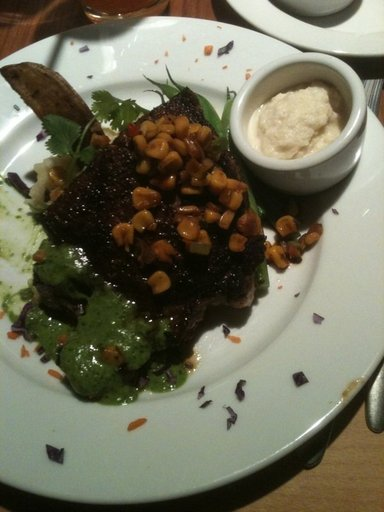

In [8]:
## visualizing and image
import random
from PIL import Image

# random.seed(42)

# get all the image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))


random_image_path = random.choice(image_path_list)

print(random_image_path)

# get image class from path name (image class is name of the directory where the image is stored)

image_class = random_image_path.parent.stem
print(image_class)


# open image
img = Image.open(random_image_path)

print(f"image size {img.size}")
print(f"image height {img.height}")
print(f"image width {img.width}")
img

Image size : (512, 384, 3)


(-0.5, 383.5, 511.5, -0.5)

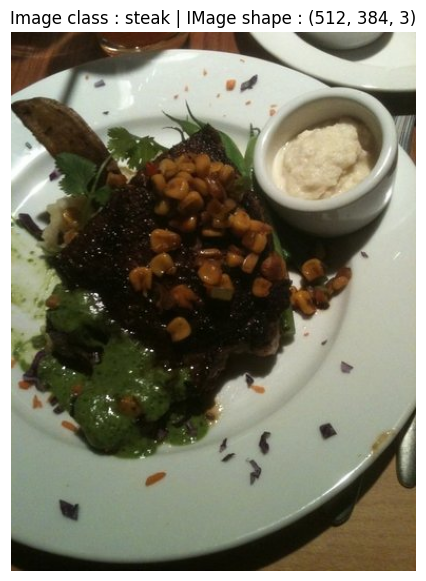

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# turn the image as array
image_array = np.asarray(img)
print(f"Image size : {image_array.shape}")

plt.figure(figsize=(10,7))
plt.imshow(image_array)

plt.title(f"Image class : {image_class} | IMage shape : {image_array.shape}")
plt.axis(False)

In [10]:
# convert array to pytorch tensors

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Transforming image with torchvision.transforms

In [11]:
#Transform the input image to tensor
data_transform = transforms.Compose([
    # Resize the image to 64x64
    transforms.Resize(size=(64,64)),
    # Flip the image randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into the torch.Tensor
    transforms.ToTensor()
])

In [12]:
data_transform(img).shape

torch.Size([3, 64, 64])

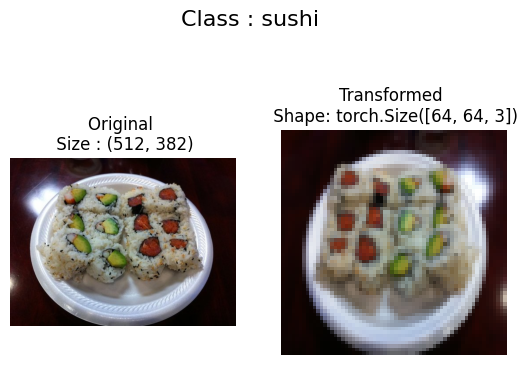

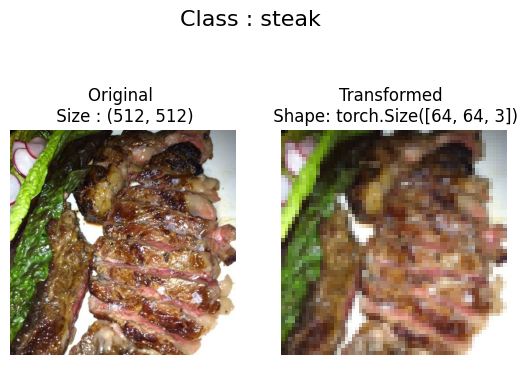

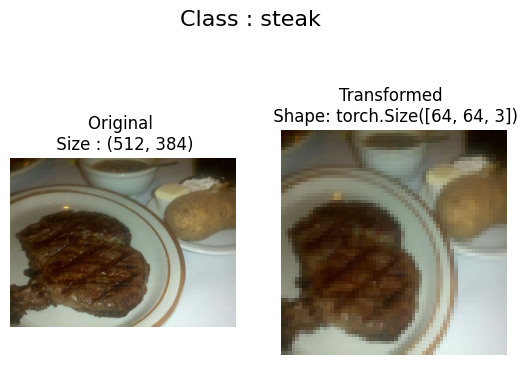

In [13]:
def plot_transformed_images(image_paths, transform, n=3, rseed=42):
  """
  Select the random images from the given path and loads/transforms then into a plot
  """
  random.seed(rseed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1,2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \n Size : {f.size}")
      ax[0].axis("off")

      # transform and plot the image
      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \n Shape: {transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class : {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        rseed=42)

In [14]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [15]:
# load data using torcvh visiin data sets

from torchvision import datasets

train_datasets = datasets.ImageFolder(
    root=train_dir,
    transform=data_transform,
    target_transform=None
)

test_datasets = datasets.ImageFolder(
    root=test_dir,
    transform=data_transform,
    target_transform=None
)

train_datasets, test_datasets

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [16]:
class_names = train_datasets.classes

In [17]:
image, label = train_datasets[0][0], train_datasets[0][1]

class_names[label]

print(f"Image tensor:\n {image}")
print(f"Shape: {image.shape}")
print(f"Image datatype: {image.dtype}")
print(f"Label: {class_names[label]}")

Image tensor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

Image shape: torch.Size([3, 64, 64]) -> torch.Size([64, 64, 3])


(-0.5, 63.5, 63.5, -0.5)

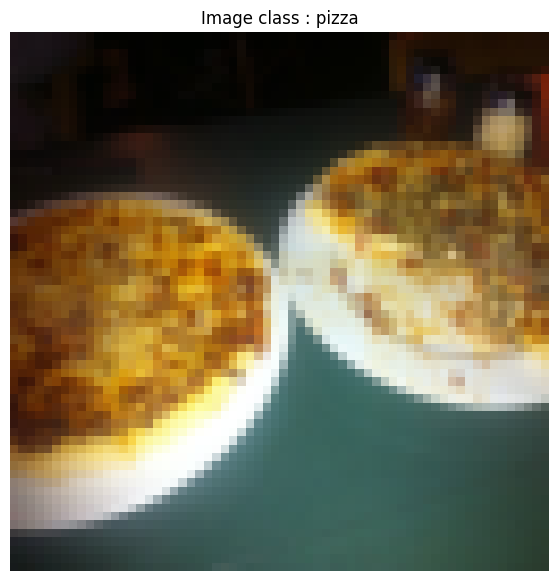

In [18]:
# Rearrange the order as we are expecting data in height, width, color channels
img_permute = image.permute(1,2,0)

print(f"Image shape: {image.shape} -> {img_permute.shape}")

plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.title(f"Image class : {class_names[label]}")
plt.axis(False)

In [19]:
len(train_datasets)

225

In [20]:
import os
# Creating train and test data loader
train_dataloader = DataLoader(
    dataset=train_datasets,
    batch_size=32,
    shuffle=True,
    num_workers= os.cpu_count() # will use available cpu for processing
)

test_dataloader = DataLoader(
    dataset=test_datasets,
    batch_size=32,
    shuffle=False,
    num_workers= os.cpu_count()
)


len(train_dataloader), len(test_dataloader) # 8 batch for train_dataloader and 3 batch of test dataloader


(8, 3)

In [21]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape}")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 64, 64])
Label shape: torch.Size([32])


## Loading data with the custom dataset

- Able to load image from file
- able to get the class names from the dataset
- able to get the classess as dictionary from the dataset


In [22]:
import os
import pathlib

from torch.utils.data import Dataset
from PIL import Image
from torchvision import transforms
from typing import Tuple, Dict, List

In [23]:
# create function to display random images
def display_random_images(
    datasets: torch.utils.data.Dataset,
    classes: List[str] = None,
    n:int = 10,
    display_shape:bool = True,
    seed: int = None):
  # Adjust display if n is too high
  if n>10:
    n = 10;
    display_shape = False
    print(f"Setting the display to default 10, provided is quite too large.")

  if seed:
    random.seed(seed)

  # get random sample indexes
  random_sample_idx = random.sample(range(len(datasets)), k=n)

  # setup sub plot
  plt.figure(figsize=(16,8))

  for i, target_sample in enumerate(random_sample_idx):
    targ_image, targ_label = datasets[target_sample][0], datasets[target_sample][1]

    # Adjust tensor dimension for plotting
    targ_image_adjust = targ_image.permute(1,2,0)

    # plot images
    plt.subplot(1,n,i+1)
    plt.imshow(targ_image_adjust)
    plt.axis(False)
    if classes is not None:
      plt.title(f"class: {classes[targ_label]}")
    else:
      plt.title(f"class: {targ_label}")

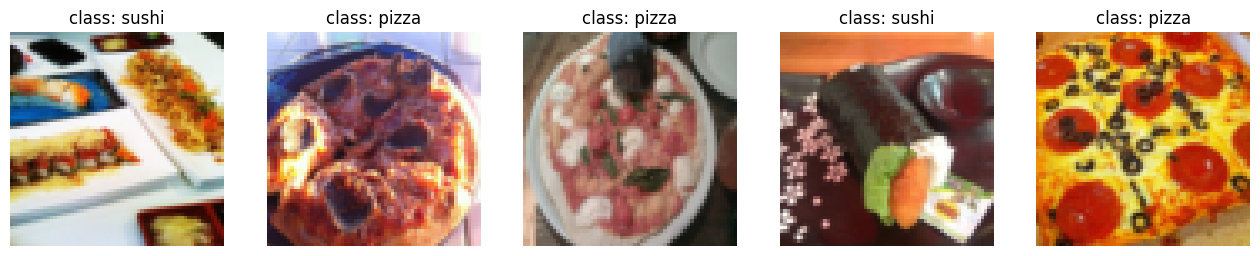

In [24]:
display_random_images(datasets=train_datasets,
                      classes=class_names,
                      n=5,
                      seed=42
                      )

In [25]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

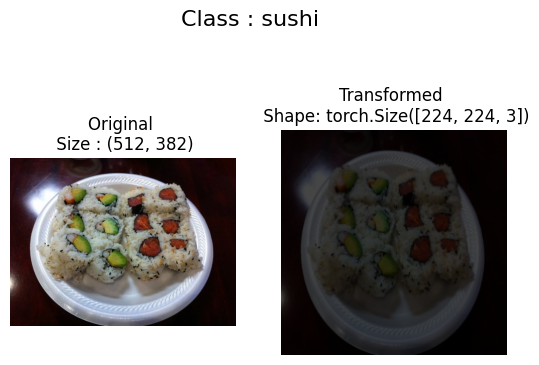

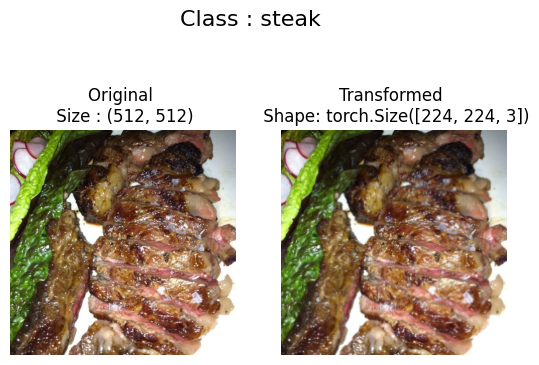

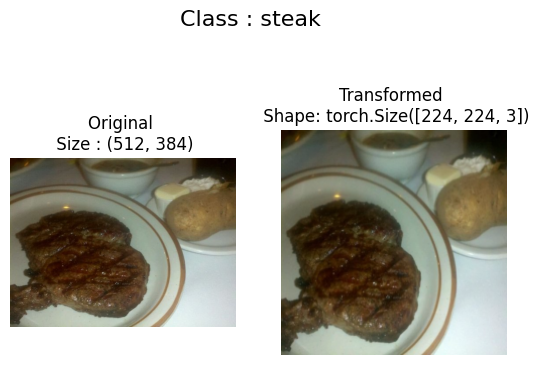

In [28]:
plot_transformed_images(image_paths=image_path_list,
                        transform=train_transform,
                        n=3,
                        rseed=42)

In [29]:
# create simple transform
simple_transform= transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [31]:
# load and transform data
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                         transform=simple_transform)


# Transforms the datasets to Dataloader
import os
from torch.utils.data import DataLoader

BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()


train_dataloader_simple = DataLoader(
    dataset=train_data_simple,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS
)

test_dataloader_simple = DataLoader(
    dataset=test_data_simple,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS
)

train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7afc93747ad0>,
 <torch.utils.data.dataloader.DataLoader at 0x7afc935f0590>)

In [32]:
#Create TinyVGG model class
from torch import nn
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_shape:int,
               output_shape: int):
    super().__init__();
    self.conv_first_block = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_shape,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_shape,
                  out_channels=hidden_shape,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )

    self.conv_second_block = nn.Sequential(
        nn.Conv2d(in_channels=hidden_shape,
                  out_channels=hidden_shape,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_shape,
                  out_channels=hidden_shape,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_shape*16*16,
                  out_features=output_shape)
    )


  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.classifier(self.conv_second_block(self.conv_first_block(x)))

In [34]:
torch.manual_seed(42)

model_0 = TinyVGG(input_shape=3, # number of color channels, as this is color image so we ahve 3
                  hidden_shape=16, # hidden layers
                  output_shape=len(class_names) # output needs to be length of class
                  )

model_0

TinyVGG(
  (conv_first_block): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_second_block): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=4096, out_features=3, bias=True)
  )
)